In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Dataset size is too high. Instead of exporting, adding the Kaggle API to directly import the data

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats
#Downloading dataset from Kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


The Dataset is downloaded but in zip fotmat.
#Extracting the data by inporting zipfile directory

In [4]:
import zipfile as zp
zip_ref = zp.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#Importing necessary Libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#Normalizing the image pixel data, to get the data size from 0 to 1...by dividing it with 255

In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Training the CNN Model for Classification

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 110ms/step - loss: 1.3875 - accuracy: 0.5718 - val_loss: 0.6286 - val_accuracy: 0.6682
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5802 - accuracy: 0.6953 - val_loss: 0.5298 - val_accuracy: 0.7510
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5159 - accuracy: 0.7501 - val_loss: 0.5891 - val_accuracy: 0.7122
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4338 - accuracy: 0.7975 - val_loss: 0.4731 - val_accuracy: 0.7750
Epoch 5/10
625/625 [==============================] - 67s 105ms/step - loss: 0.3818 - accuracy: 0.8243 - val_loss: 0.5284 - val_accuracy: 0.7566
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3344 - accuracy: 0.8507 - val_loss: 0.5698 - val_accuracy: 0.7704
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2628 - accuracy: 0.8856 - val_loss: 0.5280 - val_ac

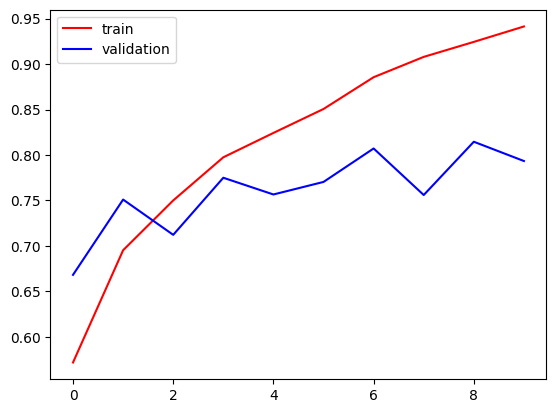

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

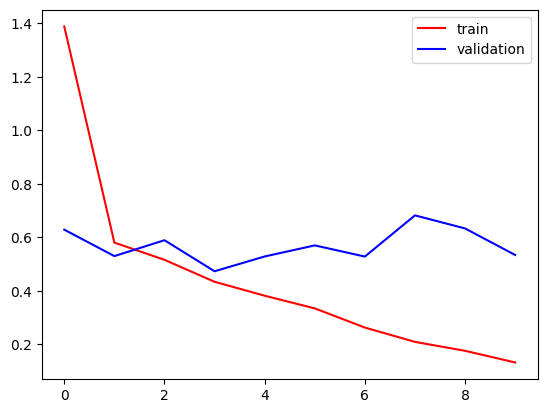

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [17]:
import cv2

In [29]:
test_img = cv2.imread('cat.jpg')

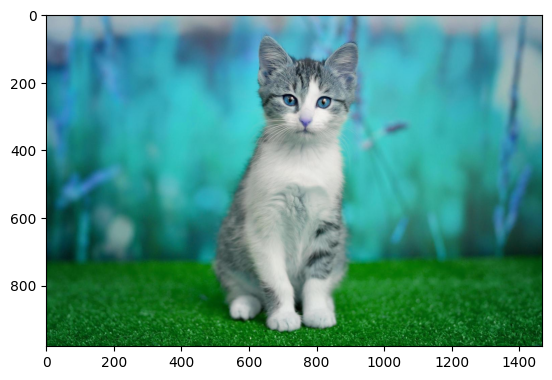

In [30]:
plt.imshow(test_img)

In [32]:
test_img.shape

(980, 1468, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

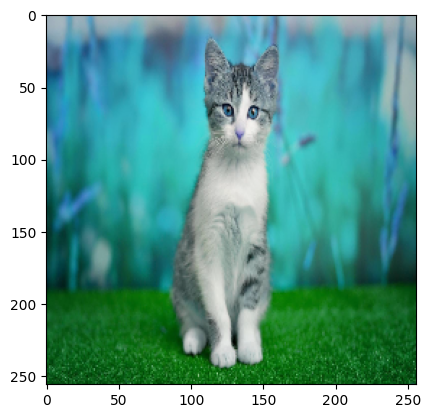

In [34]:
plt.imshow(test_img)

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [22]:
test_img2 = cv2.imread('Dog.jpeg')

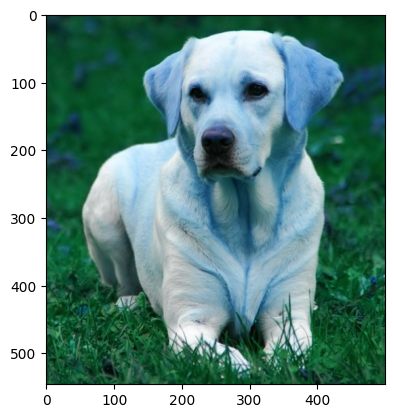

In [23]:
plt.imshow(test_img2)

In [27]:
test_input2.shape,test_input2.size

((1, 256, 256, 3), 196608)

In [25]:
test_input2 = cv2.resize(test_img2, (256, 256))

In [26]:
test_input2 = test_input2.reshape((1, 256, 256, 3))

In [28]:
model.predict(test_input2)

1/1 [==============================] - 0s 381ms/step


array([[1.]], dtype=float32)

In [43]:
def model_predict(img):
 if model.predict(img) > 0.5:
     print('Dog')
 else:
     print('Cat')
model_predict(test_input2)

1/1 [==============================] - 0s 18ms/step
Dog


In [ ]:
print('First image is of:' , model_predict(test_input))
print('Second image is of:' ,model_predict(test_input2))

#By Defining Function

In [57]:
img=cv2.imread('ABCD_cat.jpg')

In [60]:
def model_predict(img):
    img = cv2.resize(img, (256, 256))
    img = img.reshape((1, 256, 256, 3))
    return model.predict(img)

if model_predict(img) > 0.5:
     print('Dog')
else:
     print('Cat')

1/1 [==============================] - 0s 29ms/step
Cat
